In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
#import data from file with seperator selection and columns casting
users=pd.read_csv('USAGE_MOUNTHLY_SORTANT_B.csv',sep=';')

/home/salemchnigui/anaconda3/envs/MLenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
users.head()

,MSISDN,CODE_CONTRAT,ID_OFFRE,FLAG_3G,FLAG_4G,NB_CHANGEMENT_OFFRE,LAST_DATE_CHANGEMENT_OFFRE,flag_churn,prestation,MONTH_DT,NB_APPEL_out,DUREE_APPEL_out,NB_APPEL_TT_GSM_out,DUREE_APPEL_TT_GSM_out,DUREE_APPEL_TT_FIXE_out,NB_APPEL_TT_FIXE_out
0,ID_149702594.5,NaN,NaN,NaN,NaN,NaN,NaN,0,autre,01FEB2019:00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_149423182,NaN,NaN,NaN,NaN,NaN,NaN,0,autre,01FEB2019:00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2,ID_149407841.5,NaN,NaN,NaN,NaN,NaN,NaN,1,PRP,01FEB2019:00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
3,ID_149258273.5,NaN,NaN,NaN,NaN,NaN,NaN,0,autre,01FEB2019:00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
4,ID_149311750,NaN,NaN,NaN,NaN,NaN,NaN,1,PRP,01FEB2019:00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#select only rows of July
usersJul=users[users['MONTH_DT']=='01JUL2019:00:00:00']

In [5]:
usersJul.head()

,MSISDN,CODE_CONTRAT,ID_OFFRE,FLAG_3G,FLAG_4G,NB_CHANGEMENT_OFFRE,LAST_DATE_CHANGEMENT_OFFRE,flag_churn,prestation,MONTH_DT,NB_APPEL_out,DUREE_APPEL_out,NB_APPEL_TT_GSM_out,DUREE_APPEL_TT_GSM_out,DUREE_APPEL_TT_FIXE_out,NB_APPEL_TT_FIXE_out
89832,ID_149702594.5,NaN,NaN,NaN,NaN,NaN,NaN,0,autre,01JUL2019:00:00:00,17.0,44.38,6.0,36.73,1.72,2.0
89833,ID_149423182,NaN,NaN,NaN,NaN,NaN,NaN,0,autre,01JUL2019:00:00:00,17.0,44.38,6.0,36.73,1.72,2.0
89834,ID_149407841.5,NaN,NaN,NaN,NaN,NaN,NaN,1,PRP,01JUL2019:00:00:00,17.0,44.38,6.0,36.73,1.72,2.0
89835,ID_149258273.5,NaN,NaN,NaN,NaN,NaN,NaN,0,autre,01JUL2019:00:00:00,17.0,44.38,6.0,36.73,1.72,2.0
89836,ID_149311750,NaN,NaN,NaN,NaN,NaN,NaN,1,PRP,01JUL2019:00:00:00,17.0,44.38,6.0,36.73,1.72,2.0


In [6]:
#delete duplicated columns based on MSISDN because it must be unique
finalUsers=usersJul.drop_duplicates(subset='MSISDN',keep=False)

In [7]:
finalUsers.count()

MSISDN                        14578
CODE_CONTRAT                  14578
ID_OFFRE                      14578
FLAG_3G                       10939
FLAG_4G                       10939
NB_CHANGEMENT_OFFRE             313
LAST_DATE_CHANGEMENT_OFFRE      313
flag_churn                    14578
prestation                    14578
MONTH_DT                      14578
NB_APPEL_out                  14313
DUREE_APPEL_out               14318
NB_APPEL_TT_GSM_out            5517
DUREE_APPEL_TT_GSM_out         5521
DUREE_APPEL_TT_FIXE_out        9967
NB_APPEL_TT_FIXE_out           9966
dtype: int64

In [8]:
finalUsers=finalUsers.fillna(0)

In [9]:
finalUsers.head()

,MSISDN,CODE_CONTRAT,ID_OFFRE,FLAG_3G,FLAG_4G,NB_CHANGEMENT_OFFRE,LAST_DATE_CHANGEMENT_OFFRE,flag_churn,prestation,MONTH_DT,NB_APPEL_out,DUREE_APPEL_out,NB_APPEL_TT_GSM_out,DUREE_APPEL_TT_GSM_out,DUREE_APPEL_TT_FIXE_out,NB_APPEL_TT_FIXE_out
103108,ID_139977019,BS_10004559,201.0,0.0,0.0,0.0,0,1,PRP,01JUL2019:00:00:00,2.0,0.60,0.0,0.00,0.00,0.0
103140,ID_138027232,BS_1000802,265.0,1.0,1.0,0.0,0,1,PRP,01JUL2019:00:00:00,4.0,0.43,0.0,0.00,0.43,4.0
103311,ID_138027800.5,BS_1002116,118.0,0.0,0.0,0.0,0,0,PRP,01JUL2019:00:00:00,16.0,14.88,7.0,8.88,2.83,4.0
104032,ID_146171237.5,BS_10040570,289.0,0.0,0.0,0.0,0,0,PRP,01JUL2019:00:00:00,518.0,1030.77,210.0,481.63,0.00,0.0
104074,ID_146428429,BS_10042005,289.0,1.0,1.0,0.0,0,1,PRP,01JUL2019:00:00:00,6.0,2.22,0.0,0.00,2.22,6.0


In [10]:
#show correlation between columns
finalUsers.corr()

,ID_OFFRE,FLAG_3G,FLAG_4G,NB_CHANGEMENT_OFFRE,flag_churn,NB_APPEL_out,DUREE_APPEL_out,NB_APPEL_TT_GSM_out,DUREE_APPEL_TT_GSM_out,DUREE_APPEL_TT_FIXE_out,NB_APPEL_TT_FIXE_out
ID_OFFRE,1.000000,-0.121117,-0.065010,0.029356,0.129277,0.079335,0.072182,0.073068,0.069293,0.055535,0.067594
FLAG_3G,-0.121117,1.000000,0.715806,0.001771,-0.000510,0.019755,0.034220,0.010584,0.021035,0.049206,0.012875
FLAG_4G,-0.065010,0.715806,1.000000,-0.008649,-0.011247,0.064570,0.076176,0.045743,0.053128,0.075780,0.027685
NB_CHANGEMENT_OFFRE,0.029356,0.001771,-0.008649,1.000000,-0.023797,0.017754,0.012991,0.025746,0.022357,-0.004120,-0.015443
flag_churn,0.129277,-0.000510,-0.011247,-0.023797,1.000000,-0.413601,-0.382468,-0.418888,-0.370779,-0.088525,0.128577
NB_APPEL_out,0.079335,0.019755,0.064570,0.017754,-0.413601,1.000000,0.888217,0.919037,0.810399,0.370022,0.149030
DUREE_APPEL_out,0.072182,0.034220,0.076176,0.012991,-0.382468,0.888217,1.000000,0.807768,0.877689,0.367388,0.062318
NB_APPEL_TT_GSM_out,0.073068,0.010584,0.045743,0.025746,-0.418888,0.919037,0.807768,1.000000,0.875608,0.260321,0.022634
DUREE_APPEL_TT_GSM_out,0.069293,0.021035,0.053128,0.022357,-0.370779,0.810399,0.877689,0.875608,1.000000,0.280213,0.028722
DUREE_APPEL_TT_FIXE_out,0.055535,0.049206,0.075780,-0.004120,-0.088525,0.370022,0.367388,0.260321,0.280213,1.000000,0.485250


In [11]:
#select features to be used in training and testing
X=finalUsers[['ID_OFFRE','FLAG_3G','FLAG_4G','NB_CHANGEMENT_OFFRE'\
              ,'NB_APPEL_out','DUREE_APPEL_out','NB_APPEL_TT_GSM_out','DUREE_APPEL_TT_GSM_out'\
             ,'NB_APPEL_TT_FIXE_out','DUREE_APPEL_TT_FIXE_out']]

In [12]:
#select the predicted column
y=finalUsers['flag_churn']

In [13]:
#split data into training and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [14]:
X_train.count()

ID_OFFRE                   10933
FLAG_3G                    10933
FLAG_4G                    10933
NB_CHANGEMENT_OFFRE        10933
NB_APPEL_out               10933
DUREE_APPEL_out            10933
NB_APPEL_TT_GSM_out        10933
DUREE_APPEL_TT_GSM_out     10933
NB_APPEL_TT_FIXE_out       10933
DUREE_APPEL_TT_FIXE_out    10933
dtype: int64

In [15]:
y_train.count()

10933


# simple visualizations

## feature pair plot

<IPython.core.display.Javascript object>


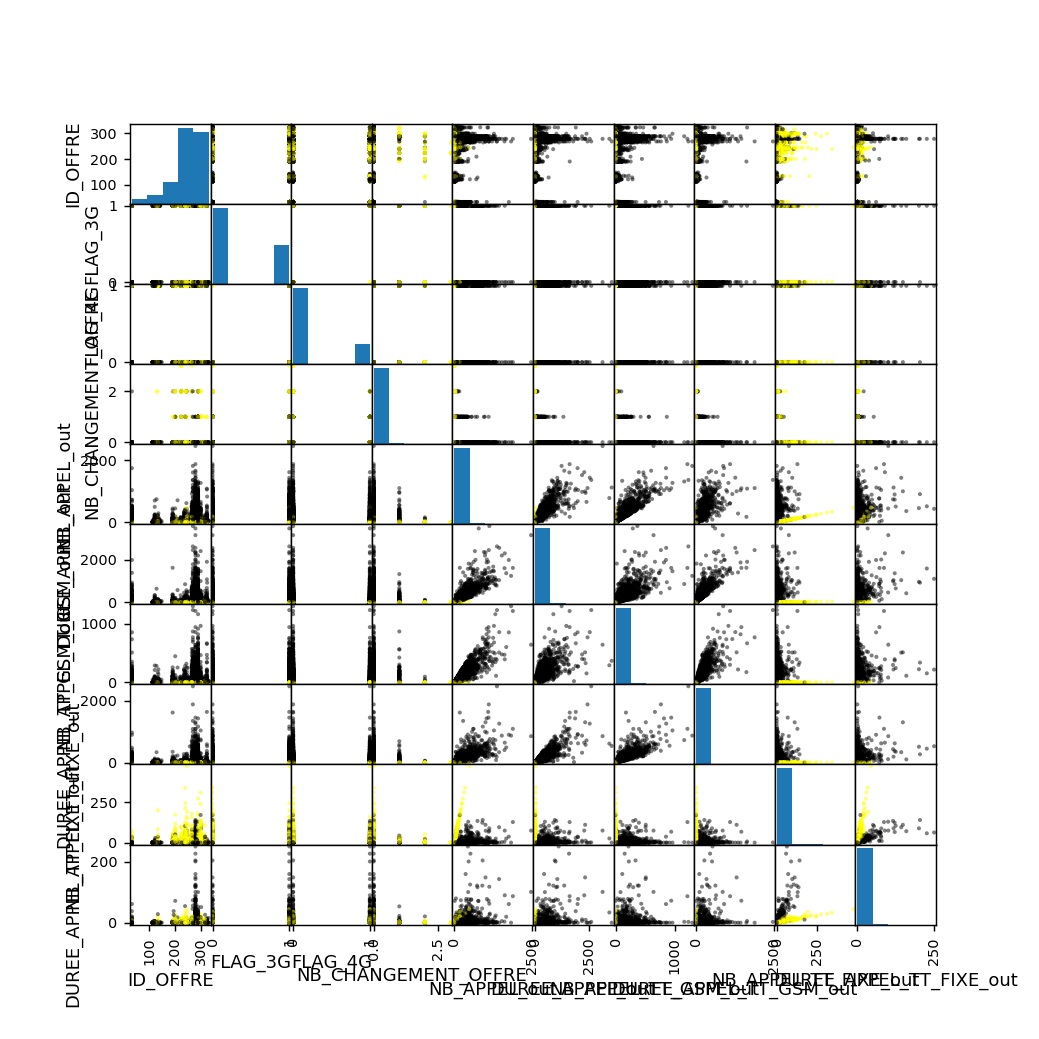

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02bd500810>,
      dtype=object)

In [16]:
from matplotlib import cm
cmap=cm.get_cmap('gnuplot')
pd.plotting.scatter_matrix(X_train,c=y_train,marker='o',s=5,hist_kwds={'bins':5},figsize=(8,8),cmap=cmap)

In [17]:
plt.rcParams.update({'font.size':12,'figure.figsize':(5,5)})

<IPython.core.display.Javascript object>


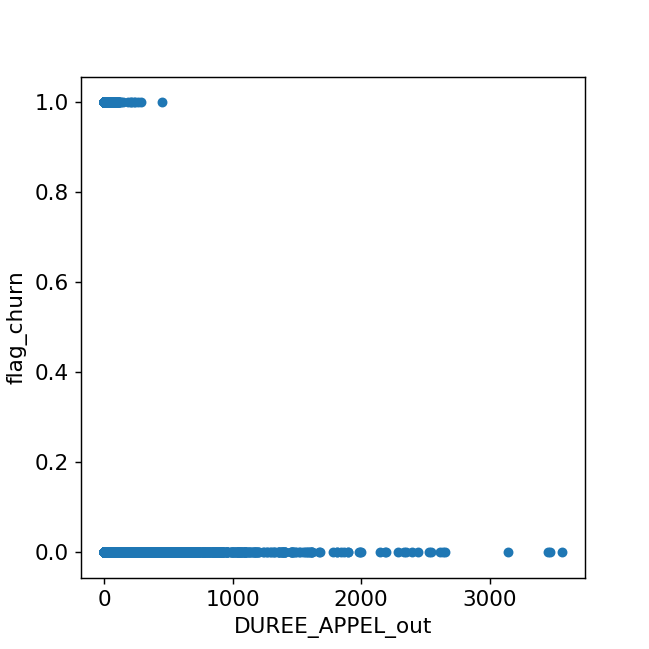

In [18]:
finalUsers.plot(kind='scatter',y='flag_churn',x='DUREE_APPEL_out')

<IPython.core.display.Javascript object>


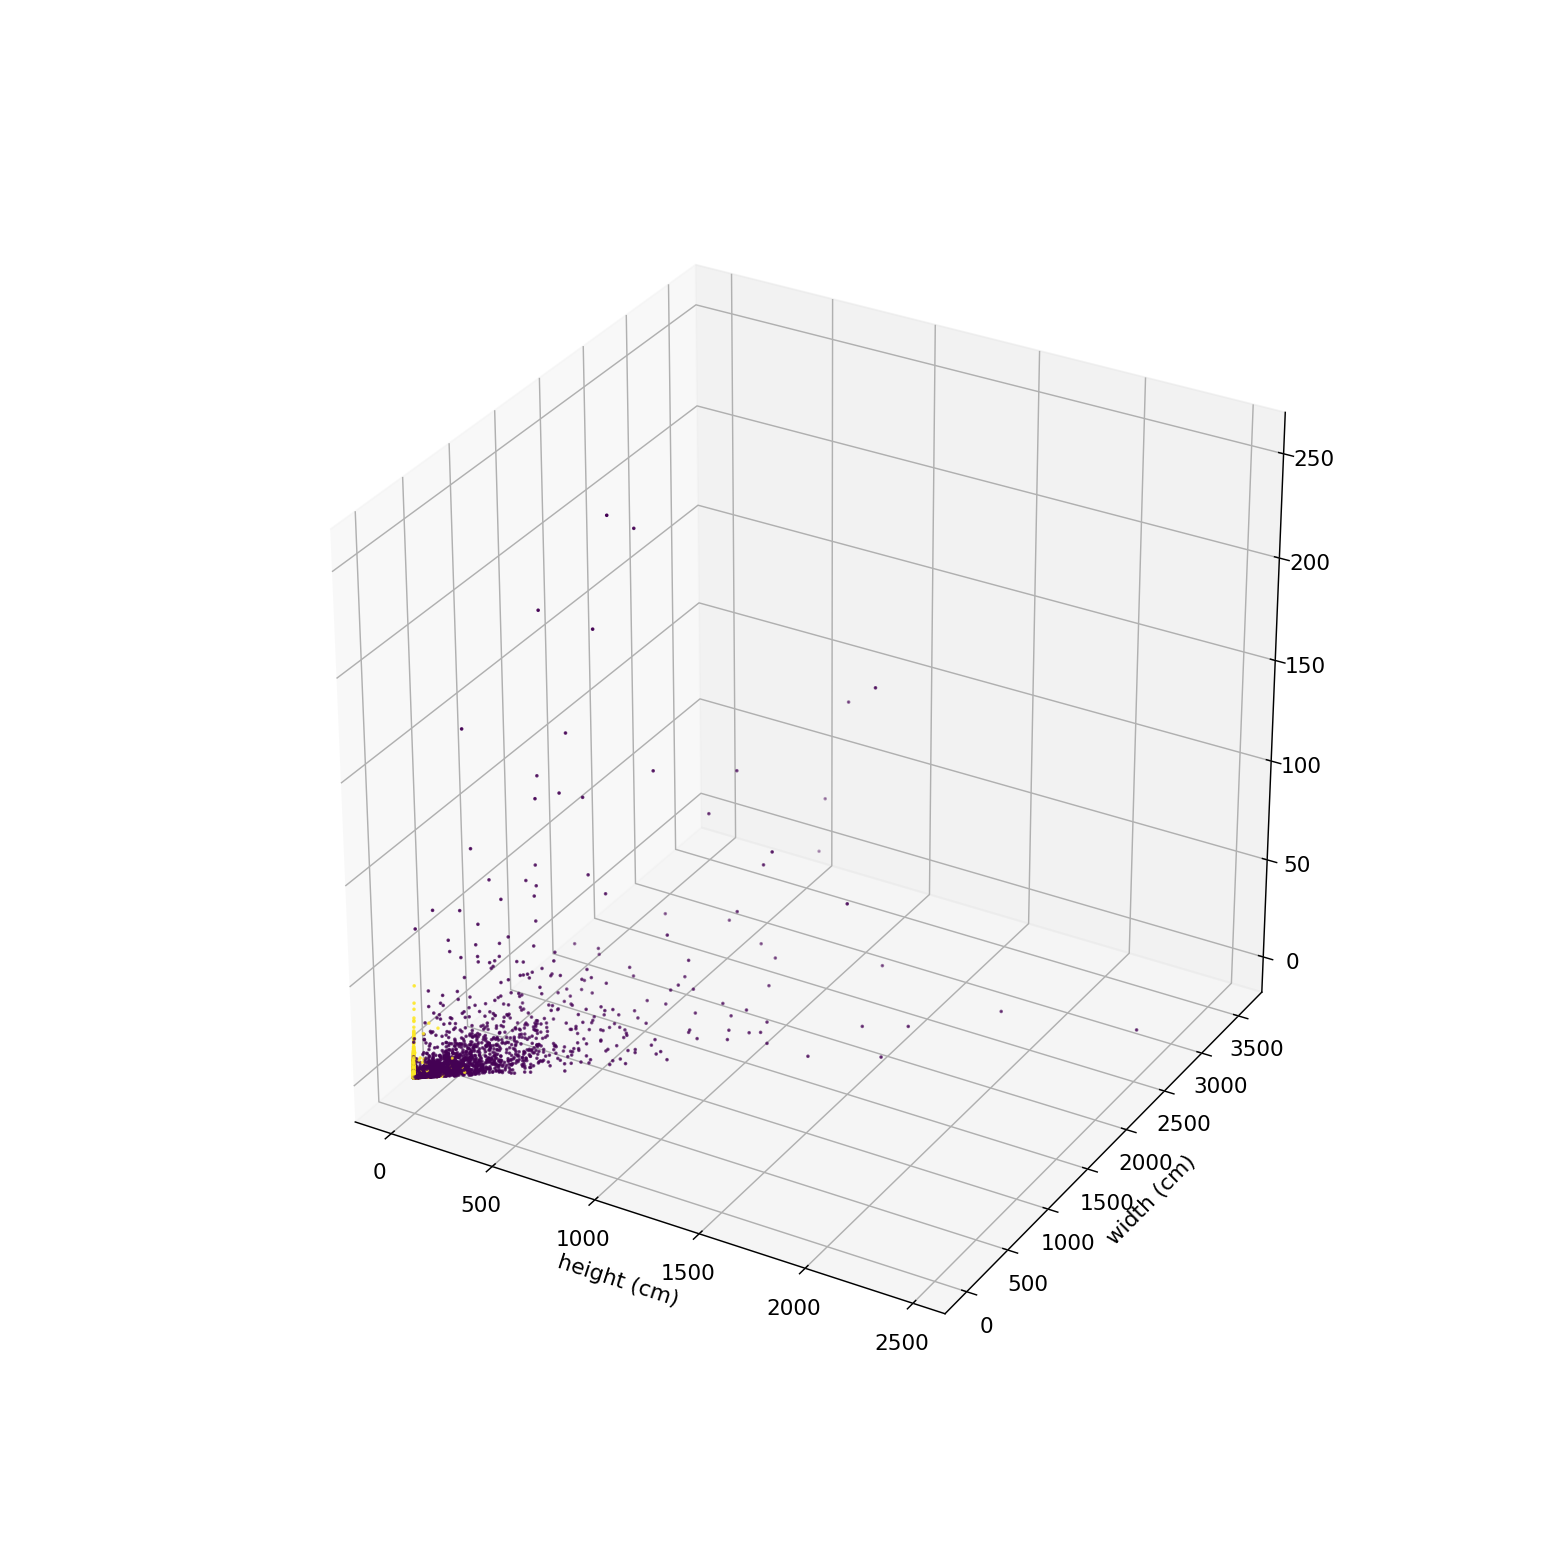

In [50]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X_train['DUREE_APPEL_TT_GSM_out'],X_train['DUREE_APPEL_out'],X_train['DUREE_APPEL_TT_FIXE_out'],c=y_train,marker='o',s=1)
plt.show()

# K nearest neighbors classification

### create classifier object

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)

### train the classifier (fit the estimator) using training data

In [29]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

###  estimate the accuracy of the classifier on future data, using the test data

In [30]:
knn.score(X_test,y_test)

0.8825788751714677

### use the trained k-NN classifier model to classify new, previously unseen objects


In [22]:
user_pred=knn.predict([[239.0,0,0,0,10,7000,0,0,0,0]])

In [23]:
user_pred[0]

0

### modify the value of k to find the best accuracy

In [25]:
scores=[]
for k in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))


<IPython.core.display.Javascript object>


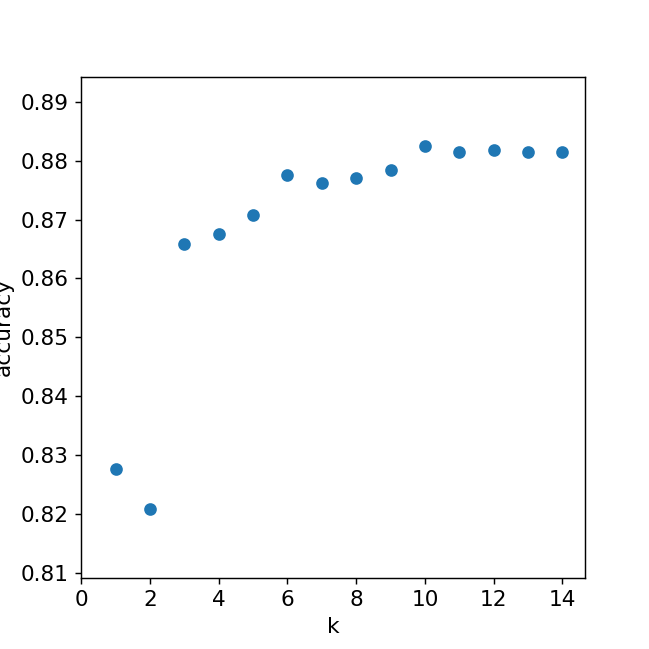

([<matplotlib.axis.XTick at 0x7f02ae9d5ad0>,
 <a list of 8 Text xticklabel objects>)

In [34]:
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(range(1,15),scores)
plt.xticks([0,2,4,6,8,10,12,14])